In [7]:
#Importing necessary liberaries
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd

#Code from the API page
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15', #limited from 5000 to 15
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '------------YOUR API KEY HERE------------',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-10-09T13:28:52.953Z', 'error_code': 0, 'error_message': None, 'elapsed': 34, 'credit_count': 1, 'notice': None, 'total_count': 8958}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10487, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [8]:
#Priting the data in a data frame
df = pd.json_normalize(data['data'])
# pd.set_option('display.max_columns', None)

#Making a column for the time stamp
df['timestamp'] = pd.to_datetime('now')
df


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10487,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.950849e+07,1.950849e+07,False,NaN,1,NaN,NaN,None,2023-10-09T13:27:00.000Z,27462.988311,1.004666e+10,40.6982,-0.155839,-1.510656,-3.244773,6.243727,-7.036380,-9.667392,5.357614e+11,50.0564,5.767228e+11,None,2023-10-09T13:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-09 16:28:56.986149
1,1027,Ethereum,ETH,ethereum,7510,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202492e+08,1.202492e+08,True,NaN,2,NaN,NaN,None,2023-10-09T13:27:00.000Z,1590.595792,4.707608e+09,55.7471,-0.043334,-2.352937,-7.961915,-2.570933,-14.205192,-14.855669,1.912679e+11,17.8743,1.912679e+11,None,2023-10-09T13:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-09 16:28:56.986149
2,825,Tether USDt,USDT,tether,63310,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.347444e+10,8.662571e+10,True,NaN,3,NaN,NaN,None,2023-10-09T13:27:00.000Z,1.000013,1.671190e+10,44.6859,-0.018832,-0.051339,-0.056369,0.022614,0.093511,-0.009330,8.347549e+10,7.7974,8.662680e+10,None,2023-10-09T13:27:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-09 16:28:56.986149
3,1839,BNB,BNB,bnb,1668,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538456e+08,1.538456e+08,False,NaN,4,NaN,NaN,None,2023-10-09T13:27:00.000Z,207.420447,3.077786e+08,23.2634,0.323021,-1.642563,-5.363380,-3.422869,-14.388671,-15.948605,3.191073e+10,2.9808,3.191073e+10,None,2023-10-09T13:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-09 16:28:56.986149
4,52,XRP,XRP,xrp,1108,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.338730e+10,9.998838e+10,False,NaN,5,NaN,NaN,None,2023-10-09T13:27:00.000Z,0.501655,8.077679e+08,151.6642,0.475059,-3.758773,-4.265967,-0.181598,-20.703436,5.820006,2.678201e+10,2.5028,5.016551e+10,None,2023-10-09T13:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-09 16:28:56.986149
5,3408,USDC,USDC,usd-coin,14372,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.554217e+10,2.554217e+10,False,NaN,6,NaN,NaN,None,2023-10-09T13:27:00.000Z,0.999851,2.220584e+09,63.4550,-0.013912,-0.014159,-0.030977,-0.033843,-0.016157,-0.024387,2.553838e+10,2.3863,2.553838e+10,None,2023-10-09T13:27:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-10-09 16:28:56.986149
6,5426,Solana,SOL,solana,534,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.143661e+08,5.595096e+08,True,NaN,7,NaN,NaN,None,2023-10-09T13:27:00.000Z,22.225333,2.735254e+08,38.7914,0.068293,-4.586504,-7.424886,13.899182,-9.669898,0.299129,9.209424e+09,0.8606,1.243529e+10,None,2023-10-09T13:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-09 16:28:56.986149
7,2010,Cardano,ADA,cardano,943,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.514849e+10,3.624429e+10,False,NaN,8,NaN,NaN,None,2023-10-09T13:27:00.000Z,0.251604,1.079480e+08,28.5992,0.202252,-2.192360,-6.064693,-0.923040,-15.778341,-13.743945,8.843497e+09,0.8261,1.132217e+10,None,2023-10-09T13:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-09 16:28:56.986149
8,74,Dogecoin,DOGE,dogecoin,803,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me.

In [35]:
#Automating pulling the data
def api_runner():
    global df #takes the global df variable
    #Code from the API page
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15', #limited from 5000 to 15
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '434cea37-74d7-465e-88d1-9451f6ca9183',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
#       print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    #Priting the data in a data frame
    df2 = pd.json_normalize(data['data'])
    # pd.set_option('display.max_columns', None) #showing all column

    #Making a column for the time stamp
    df2['timestamp'] = pd.to_datetime('now')
    
    #Appending the DataFrames to the original df every time the fucntion runs
    df_append = pd.DataFrame(df2)
    df = pd.concat([df,df_append])
    
    #Put the data into a csv
    if not os.path.isfile(r'C:\Users\AhmedSharaf\CryptoAPI.csv'):
        df.to_csv(r'C:\Users\AhmedSharaf\CryptoAPI.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\AhmedSharaf\CryptoAPI.csv', mode = 'a', header = False)


In [36]:
#For automation
import os
from time import time
from time import sleep

#Run the function to pull the data max 333 times a day
for i in range(5): #How many times we can pull data with the free API
    api_runner()
    print('-----------------------------API Runner Completed-----------------------------')
    #Run the function every minute
    sleep(60)
exit()

-----------------------------API Runner Completed-----------------------------
-----------------------------API Runner Completed-----------------------------
-----------------------------API Runner Completed-----------------------------
-----------------------------API Runner Completed-----------------------------
-----------------------------API Runner Completed-----------------------------


KeyboardInterrupt: 

In [32]:
df
# pd.set_option('display.max_rows', None) #showing all rows

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10487,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.950849e+07,1.950849e+07,False,NaN,1,NaN,NaN,None,2023-10-09T14:08:00.000Z,27486.095436,9.993835e+09,34.9646,0.268476,-1.523516,-3.223075,6.426654,-7.286786,-9.622064,5.362121e+11,50.0135,5.772080e+11,None,2023-10-09T14:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-09 17:10:41.502510
1,1027,Ethereum,ETH,ethereum,7510,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202492e+08,1.202492e+08,True,NaN,2,NaN,NaN,None,2023-10-09T14:08:00.000Z,1591.709730,4.707483e+09,51.0926,0.301945,-2.280549,-7.399493,-2.377340,-14.496663,-14.707317,1.914018e+11,17.8490,1.914018e+11,None,2023-10-09T14:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-09 17:10:41.502510
2,825,Tether USDt,USDT,tether,63316,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.347444e+10,8.662571e+10,True,NaN,3,NaN,NaN,None,2023-10-09T14:08:00.000Z,1.000234,1.669745e+10,41.1319,0.020471,-0.030990,-0.069092,0.057540,0.107488,0.014274,8.349394e+10,7.7917,8.664595e+10,None,2023-10-09T14:08:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-09 17:10:41.502510
3,1839,BNB,BNB,bnb,1668,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538456e+08,1.538456e+08,False,NaN,4,NaN,NaN,None,2023-10-09T14:08:00.000Z,207.785387,2.998425e+08,14.0199,0.258748,-1.855671,-4.961403,-3.237947,-14.421914,-15.890497,3.196687e+10,2.9832,3.196687e+10,None,2023-10-09T14:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-09 17:10:41.502510
4,52,XRP,XRP,xrp,1108,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.338730e+10,9.998838e+10,False,NaN,5,NaN,NaN,None,2023-10-09T14:08:00.000Z,0.500942,8.524575e+08,164.6525,0.056683,-3.888141,-4.194028,-0.293276,-21.107209,5.960251,2.674394e+10,2.4940,5.009420e+10,None,2023-10-09T14:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-09 17:10:41.502510
5,3408,USDC,USDC,usd-coin,14373,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.554217e+10,2.554217e+10,False,NaN,6,NaN,NaN,None,2023-10-09T14:08:00.000Z,1.000044,2.187775e+09,54.5758,0.023558,0.002552,-0.033620,0.000528,-0.003538,-0.003172,2.554330e+10,2.3848,2.554330e+10,None,2023-10-09T14:08:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-10-09 17:10:41.502510
6,5426,Solana,SOL,solana,534,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.143661e+08,5.595096e+08,True,NaN,7,NaN,NaN,None,2023-10-09T14:08:00.000Z,22.293492,2.777644e+08,40.7019,0.450491,-4.540053,-6.626097,14.388720,-10.017460,1.228515,9.237667e+09,0.8614,1.247342e+10,None,2023-10-09T14:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-09 17:10:41.502510
7,2010,Cardano,ADA,cardano,943,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.514849e+10,3.624429e+10,False,NaN,8,NaN,NaN,None,2023-10-09T14:08:00.000Z,0.251799,1.074918e+08,27.9577,0.229306,-2.078480,-5.952592,-0.866445,-16.176860,-13.527172,8.850362e+09,0.8259,1.133096e+10,None,2023-10-09T14:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-09 17:10:41.502510
8,74,Dogecoin,DOGE,dogecoin,803,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",Na

In [37]:
pd.read_csv(r'C:\Users\AhmedSharaf\CryptoAPI.csv')

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10487,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.950849e+07,1.950849e+07,False,NaN,1,NaN,NaN,NaN,2023-10-09T14:08:00.000Z,27486.095436,9.993835e+09,34.9646,0.268476,-1.523516,-3.223075,6.426654,-7.286786,-9.622064,5.362121e+11,50.0135,5.772080e+11,NaN,2023-10-09T14:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-09 17:10:41.502510
1,1,1027,Ethereum,ETH,ethereum,7510,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202492e+08,1.202492e+08,True,NaN,2,NaN,NaN,NaN,2023-10-09T14:08:00.000Z,1591.709730,4.707483e+09,51.0926,0.301945,-2.280549,-7.399493,-2.377340,-14.496663,-14.707317,1.914018e+11,17.8490,1.914018e+11,NaN,2023-10-09T14:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-09 17:10:41.502510
2,2,825,Tether USDt,USDT,tether,63316,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.347444e+10,8.662571e+10,True,NaN,3,NaN,NaN,NaN,2023-10-09T14:08:00.000Z,1.000234,1.669745e+10,41.1319,0.020471,-0.030990,-0.069092,0.057540,0.107488,0.014274,8.349394e+10,7.7917,8.664595e+10,NaN,2023-10-09T14:08:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-09 17:10:41.502510
3,3,1839,BNB,BNB,bnb,1668,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.538456e+08,1.538456e+08,False,NaN,4,NaN,NaN,NaN,2023-10-09T14:08:00.000Z,207.785387,2.998425e+08,14.0199,0.258748,-1.855671,-4.961403,-3.237947,-14.421914,-15.890497,3.196687e+10,2.9832,3.196687e+10,NaN,2023-10-09T14:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-09 17:10:41.502510
4,4,52,XRP,XRP,xrp,1108,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.338730e+10,9.998838e+10,False,NaN,5,NaN,NaN,NaN,2023-10-09T14:08:00.000Z,0.500942,8.524575e+08,164.6525,0.056683,-3.888141,-4.194028,-0.293276,-21.107209,5.960251,2.674394e+10,2.4940,5.009420e+10,NaN,2023-10-09T14:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-09 17:10:41.502510
5,5,3408,USDC,USDC,usd-coin,14373,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.554217e+10,2.554217e+10,False,NaN,6,NaN,NaN,NaN,2023-10-09T14:08:00.000Z,1.000044,2.187775e+09,54.5758,0.023558,0.002552,-0.033620,0.000528,-0.003538,-0.003172,2.554330e+10,2.3848,2.554330e+10,NaN,2023-10-09T14:08:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-10-09 17:10:41.502510
6,6,5426,Solana,SOL,solana,534,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.143661e+08,5.595096e+08,True,NaN,7,NaN,NaN,NaN,2023-10-09T14:08:00.000Z,22.293492,2.777644e+08,40.7019,0.450491,-4.540053,-6.626097,14.388720,-10.017460,1.228515,9.237667e+09,0.8614,1.247342e+10,NaN,2023-10-09T14:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-09 17:10:41.502510
7,7,2010,Cardano,ADA,cardano,943,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.514849e+10,3.624429e+10,False,NaN,8,NaN,NaN,NaN,2023-10-09T14:08:00.000Z,0.251799,1.074918e+08,27.9577,0.229306,-2.078480,-5.952592,-0.866445,-16.176860,-13.527172,8.850362e+09,0.8259,1.133096e+10,NaN,2023-10-09T14:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-09 17:10:41.502510
8,8,74,Dogecoin,DOGE,dogecoin,803,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of

In [39]:
pd.set_option('display.float_format', lambda x: '%.5f' % x) #change the numbers notation

In [40]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10487,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19508487.00000,19508487.00000,False,NaN,1,NaN,NaN,None,2023-10-09T14:08:00.000Z,27486.09544,9993835290.97106,34.96460,0.26848,-1.52352,-3.22307,6.42665,-7.28679,-9.62206,536212135489.82812,50.01350,577208004151.55005,None,2023-10-09T14:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-09 17:10:41.502510
1,1027,Ethereum,ETH,ethereum,7510,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120249203.35353,120249203.35353,True,NaN,2,NaN,NaN,None,2023-10-09T14:08:00.000Z,1591.70973,4707483020.45218,51.09260,0.30195,-2.28055,-7.39949,-2.37734,-14.49666,-14.70732,191401826946.15662,17.84900,191401826946.16000,None,2023-10-09T14:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-09 17:10:41.502510
2,825,Tether USDt,USDT,tether,63316,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83474442137.81659,86625711834.13406,True,NaN,3,NaN,NaN,None,2023-10-09T14:08:00.000Z,1.00023,16697447155.08117,41.13190,0.02047,-0.03099,-0.06909,0.05754,0.10749,0.01427,83493941963.22884,7.79170,86645947803.53999,None,2023-10-09T14:08:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-09 17:10:41.502510
3,1839,BNB,BNB,bnb,1668,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,153845623.91041,153845623.91041,False,NaN,4,NaN,NaN,None,2023-10-09T14:08:00.000Z,207.78539,299842544.21310,14.01990,0.25875,-1.85567,-4.96140,-3.23795,-14.42191,-15.89050,31966872496.06132,2.98320,31966872496.06000,None,2023-10-09T14:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-09 17:10:41.502510
4,52,XRP,XRP,xrp,1108,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53387299665.00000,99988380689.00000,False,NaN,5,NaN,NaN,None,2023-10-09T14:08:00.000Z,0.50094,852457458.63568,164.65250,0.05668,-3.88814,-4.19403,-0.29328,-21.10721,5.96025,26743939920.32594,2.49400,50094198598.06000,None,2023-10-09T14:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-09 17:10:41.502510
5,3408,USDC,USDC,usd-coin,14373,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,25542173469.30873,25542173469.30873,False,NaN,6,NaN,NaN,None,2023-10-09T14:08:00.000Z,1.00004,2187774595.48685,54.57580,0.02356,0.00255,-0.03362,0.00053,-0.00354,-0.00317,25543300313.77962,2.38480,25543300313.78000,None,2023-10-09T14:08:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-10-09 17:10:41.502510
6,5426,Solana,SOL,solana,534,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,414366096.15288,559509555.57031,True,NaN,7,NaN,NaN,None,2023-10-09T14:08:00.000Z,22.29349,277764385.28522,40.70190,0.45049,-4.54005,-6.62610,14.38872,-10.01746,1.22851,9237667092.73777,0.86140,12473421589.15000,None,2023-10-09T14:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-09 17:10:41.502510
7,2010,Cardano,ADA,cardano,943,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35148492648.38200,36244287752.86600,False,NaN,8,NaN,NaN,None,2023-10-09T14:08:00.000Z,0.25180,107491832.21529,27.95770,0.22931,-2.07848,-5.95259,-0.86644,-16.17686,-13.52717,8850362088.77952,0.82590,11330963691.08000,None,2023-10-09T14:08:00.000Z,NaN,

In [49]:
#Group the data frame by name
df_grouped = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 
                                            'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean(numeric_only =True)
df_grouped

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.25704,-1.47156,-2.89248,6.51887,-6.96665,-9.66276
Ethereum,0.18937,-2.25779,-7.06821,-2.33932,-14.24568,-14.74218
Tether USDt,0.01507,-0.03435,-0.06699,0.04395,0.10314,0.01223
BNB,0.28079,-1.71484,-4.80349,-3.21840,-14.21785,-15.86679
XRP,-0.00409,-3.77005,-3.98120,-0.30066,-20.87169,5.93141
USDC,0.01141,0.00495,-0.02577,-0.01052,-0.00517,-0.00448
Solana,0.36100,-4.40870,-6.29203,14.38957,-9.55432,1.02682
Cardano,0.08854,-2.02767,-5.65472,-0.93930,-16.01077,-13.54972
Dogecoin,0.16112,-3.54221,-6.61421,-6.87329,-22.40469,-8.90167


In [51]:
#Transfrom the data frame
df_stacked = df_grouped.stack()
df_stacked

name                                     
Bitcoin      quote.USD.percent_change_1h      0.25704
             quote.USD.percent_change_24h    -1.47156
             quote.USD.percent_change_7d     -2.89248
             quote.USD.percent_change_30d     6.51887
             quote.USD.percent_change_60d    -6.96665
             quote.USD.percent_change_90d    -9.66276
Ethereum     quote.USD.percent_change_1h      0.18937
             quote.USD.percent_change_24h    -2.25779
             quote.USD.percent_change_7d     -7.06821
             quote.USD.percent_change_30d    -2.33932
             quote.USD.percent_change_60d   -14.24568
             quote.USD.percent_change_90d   -14.74218
Tether USDt  quote.USD.percent_change_1h      0.01507
             quote.USD.percent_change_24h    -0.03435
             quote.USD.percent_change_7d     -0.06699
             quote.USD.percent_change_30d     0.04395
             quote.USD.percent_change_60d     0.10314
             quote.USD.percent_change_90

In [54]:
#Convert the transformed (stacked) data from a series back to a data frame
stacked_to_df = df_stacked.to_frame(name = 'values')
stacked_to_df

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.25704
            quote.USD.percent_change_24h  -1.47156
            quote.USD.percent_change_7d   -2.89248
            quote.USD.percent_change_30d   6.51887
            quote.USD.percent_change_60d  -6.96665
            quote.USD.percent_change_90d  -9.66276
Ethereum    quote.USD.percent_change_1h    0.18937
            quote.USD.percent_change_24h  -2.25779
            quote.USD.percent_change_7d   -7.06821
            quote.USD.percent_change_30d  -2.33932
            quote.USD.percent_change_60d -14.24568
            quote.USD.percent_change_90d -14.74218
Tether USDt quote.USD.percent_change_1h    0.01507
            quote.USD.percent_change_24h  -0.03435
            quote.USD.percent_change_7d   -0.06699
            quote.USD.percent_change_30d   0.04395
            quote.USD.percent_change_60d   0.10314
            quote.USD.percent_change_90d   0.01223
BNB         quote.USD.percent_change_1h    0.28079
            quote.USD.percent_change_24h  -1.71484
            quote.USD.percent_change_7d   -4.80349
            quote.USD.percent_change_30d  -3.21840
            quote.USD.percent_change_60d -14.21785
            quote.USD.percent_change_90d -15.86679
XRP         quote.USD.percent_change_1h   -0.00409
            quote.USD.percent_change_24h  -3.77005
            quote.USD.percent_change_7d   -3.98120
            quote.USD.percent_change_30d  -0.30066
            quote.USD.percent_change_60d -20.87169
            quote.USD.percent_change_90d   5.93141
USDC        quote.USD.percent_change_1h    0.01141
            quote.USD.percent_change_24h   0.00495
            quote.USD.percent_change_7d   -0.02577
            quote.USD.percent_change_30d  -0.01052
            quote.USD.percent_change_60d  -0.00517
            quote.USD.percent_change_90d  -0.00448
Solana      quote.USD.percent_change_1h    0.36100
            quote.USD.percent_change_24h  -4.40870
            quote.USD.percent_change_7d   -6.29203
            quote.USD.percent_change_30d  14.38957
            quote.USD.percent_change_60d  -9.55432
            quote.USD.percent_change_90d   1.02682
Cardano     quote.USD.percent_change_1h    0.08854
            quote.USD.percent_change_24h  -2.02767
            quote.USD.percent_change_7d   -5.65472
            quote.USD.percent_change_30d  -0.93930
            quote.USD.percent_change_60d -16.01077
            quote.USD.percent_change_90d -13.54972
Dogecoin    quote.USD.percent_change_1h    0.16112
            quote.USD.percent_change_24h  -3.54221
            quote.USD.percent_change_7d   -6.61421
            quote.USD.percent_change_30d  -6.87329
            quote.USD.percent_change_60d -22.40469
            quote.USD.percent_change_90d  -8.90167
TRON        quote.USD.percent_change_1h   -0.73682
            quote.USD.percent_change_24h  -2.20286
            quote.USD.percent_change_7d   -3.57308
            quote.USD.percent_change_30d   9.07940
            quote.USD.percent_change_60d  11.29265
            quote.USD.percent_change_90d  11.51038
Toncoin     quote.USD.percent_change_1h    0.74511
            quote.USD.percent_change_24h  -2.78532
            quote.USD.percent_change_7d   -2.90904
            quote.USD.percent_change_30d  11.39378
            quote.USD.percent_change_60d  58.38470
            quote.USD.percent_change_90d  47.48481
Dai         quote.USD.percent_change_1h    0.01740
            quote.USD.percent_change_24h  -0.03986
            quote.USD.percent_change_7d   -0.01533
            quote.USD.percent_change_30d  -0.00124
            quote.USD.percent_change_60d  -0.02066
            quote.USD.percent_change_90d   0.02340
Polygon     quote.USD.percent_change_1h    0.17366
            quote.USD.percent_change_24h  -4.34096
            quote.USD.percent_change_7d   -3.96579
            quote.USD.percent_change_30d  -0.53320
            quote.USD.percent_change_60d -22.55383
            quo

In [55]:
#Count the rows in the data frame
stacked_to_df.count()

values    90
dtype: int64

In [57]:
#reset.index() to automaticaly generate an index
indexed_df = stacked_to_df.reset_index()
indexed_df

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.25704
1,Bitcoin,quote.USD.percent_change_24h,-1.47156
2,Bitcoin,quote.USD.percent_change_7d,-2.89248
3,Bitcoin,quote.USD.percent_change_30d,6.51887
4,Bitcoin,quote.USD.percent_change_60d,-6.96665
5,Bitcoin,quote.USD.percent_change_90d,-9.66276
6,Ethereum,quote.USD.percent_change_1h,0.18937
7,Ethereum,quote.USD.percent_change_24h,-2.25779
8,Ethereum,quote.USD.percent_change_7d,-7.06821
9,Ethereum,quote.USD.percent_change_30d,-2.33932


In [58]:
#change the level_1 column name
df_final = indexed_df.rename(columns={'level_1': 'precent_change'})
df_final

,name,precent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.25704
1,Bitcoin,quote.USD.percent_change_24h,-1.47156
2,Bitcoin,quote.USD.percent_change_7d,-2.89248
3,Bitcoin,quote.USD.percent_change_30d,6.51887
4,Bitcoin,quote.USD.percent_change_60d,-6.96665
5,Bitcoin,quote.USD.percent_change_90d,-9.66276
6,Ethereum,quote.USD.percent_change_1h,0.18937
7,Ethereum,quote.USD.percent_change_24h,-2.25779
8,Ethereum,quote.USD.percent_change_7d,-7.06821
9,Ethereum,quote.USD.percent_change_30d,-2.33932


In [64]:
#Change the percent_change column values to make a better visualization
df_final['precent_change'] = df_final['precent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d','quote.USD.percent_change_90d'],
                                                                ['1h','24h', '7d','30d', '60d','90d'])
df_final

,name,precent_change,values
0,Bitcoin,1h,0.25704
1,Bitcoin,24h,-1.47156
2,Bitcoin,7d,-2.89248
3,Bitcoin,30d,6.51887
4,Bitcoin,60d,-6.96665
5,Bitcoin,90d,-9.66276
6,Ethereum,1h,0.18937
7,Ethereum,24h,-2.25779
8,Ethereum,7d,-7.06821
9,Ethereum,30d,-2.33932


In [59]:
#Import liberaries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\AhmedSharaf\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


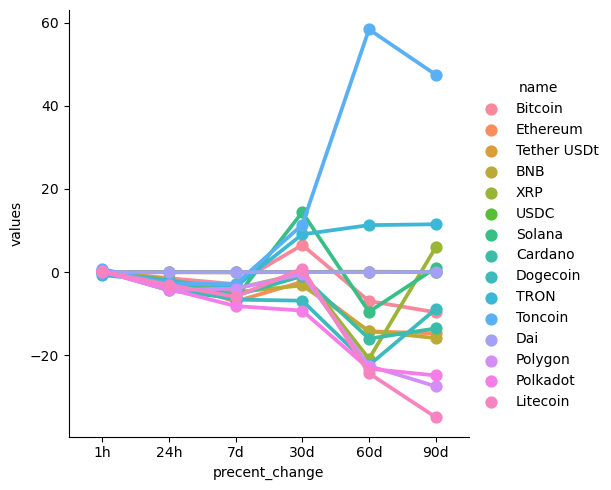

In [65]:
#Plot the precent_change column with the name
sns.catplot(x='precent_change', y='values', hue='name', data=df_final, kind='point')

In [66]:
#get the price of each coin from the original data frame
df_price = df[['name','quote.USD.price','timestamp']]
df_price

,name,quote.USD.price,timestamp
0,Bitcoin,27486.09544,2023-10-09 17:10:41.502510
1,Ethereum,1591.70973,2023-10-09 17:10:41.502510
2,Tether USDt,1.00023,2023-10-09 17:10:41.502510
3,BNB,207.78539,2023-10-09 17:10:41.502510
4,XRP,0.50094,2023-10-09 17:10:41.502510
5,USDC,1.00004,2023-10-09 17:10:41.502510
6,Solana,22.29349,2023-10-09 17:10:41.502510
7,Cardano,0.25180,2023-10-09 17:10:41.502510
8,Dogecoin,0.05902,2023-10-09 17:10:41.502510
9,TRON,0.08619,2023-10-09 17:10:41.502510


In [71]:
#Get the price of Bitcoin
df_price_bitcoin = df_price.query("name == 'Bitcoin'")
df_price_bitcoin

,name,quote.USD.price,timestamp
0,Bitcoin,27486.09544,2023-10-09 17:10:41.502510
0,Bitcoin,27486.09544,2023-10-09 17:10:41.502510
0,Bitcoin,27490.46472,2023-10-09 17:17:08.683576
0,Bitcoin,27514.53950,2023-10-09 17:18:09.711561
0,Bitcoin,27514.04472,2023-10-09 17:19:10.644134
0,Bitcoin,27540.71525,2023-10-09 17:20:11.734167
0,Bitcoin,27527.03052,2023-10-09 17:21:12.715142
0,Bitcoin,27523.86348,2023-10-09 17:35:17.153170
0,Bitcoin,27539.13034,2023-10-09 17:36:24.268444
0,Bitcoin,27526.91893,2023-10-09 17:37:25.229026


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

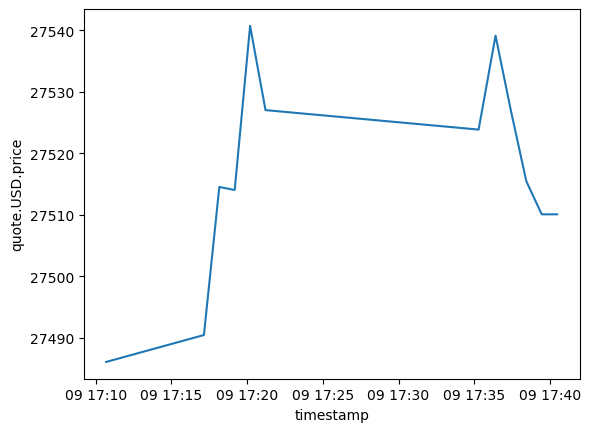

In [72]:
#Plotting the price of bitcoin with the timestamp
#sns.set_theme(style="darkgrid")
sns.lineplot(x='timestamp', y='quote.USD.price', data=df_price_bitcoin)